In [2]:
import requests
import lxml.html
import time
import pandas as pd
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
import re

In [2]:
browser = Chrome()

In [3]:
url = 'https://book.naver.com/bestsell/bestseller_list.nhn?cp=yes24&cate=001001044&bestWeek=2020-04-4&indexCount=2&type=list'

In [7]:
browser.get(url)

In [8]:
browser.find_elements_by_css_selector('div#content div#memo1 li a')[1].text

'소설'

In [10]:
length = len(browser.find_elements_by_css_selector('div.paginate a'))

In [11]:
length

5

In [12]:
urls = []
titles = []

for z in range(1,12):
    if z != 11:
        
        for i in range(length+1):
            length = len(browser.find_elements_by_css_selector('div.paginate a'))
            if i != length:

                for u in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(u)).get_attribute('href')
                    res = requests.get(url)
                    if res.status_code == 200:
                        urls.append(url)
                    elif res.status_code == 500:
                        pass

                for t in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(t)).get_attribute('href')
                    title = browser.find_element_by_css_selector('dt#book_title_{}'.format(t)).text
                    res = requests.get(url)
                    if res.status_code == 200:
                        titles.append(title)
                    elif res.status_code == 500:
                        pass

                browser.find_elements_by_css_selector('div.paginate a')[i].click()

            else:
                for q in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(q)).get_attribute('href')
                    res = requests.get(url)
                    if res.status_code == 200:
                        urls.append(url)
                    elif res.status_code == 500:
                        pass

                for w in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(w)).get_attribute('href')
                    title = browser.find_element_by_css_selector('dt#book_title_{}'.format(w)).text
                    res = requests.get(url)
                    if res.status_code == 200:
                        titles.append(title)
                    elif res.status_code == 500:
                        pass

        nxt = browser.find_elements_by_css_selector('div#content div#memo1 li a')[z+1]
        nxt.click()
        
    else:
        for i in range(length+1):
            length = len(browser.find_elements_by_css_selector('div.paginate a'))
            if i != length:

                for u in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(u)).get_attribute('href')
                    res = requests.get(url)
                    if res.status_code == 200:
                        urls.append(url)
                    elif res.status_code == 500:
                        pass

                for t in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(t)).get_attribute('href')
                    title = browser.find_element_by_css_selector('dt#book_title_{}'.format(t)).text
                    res = requests.get(url)
                    if res.status_code == 200:
                        titles.append(title)
                    elif res.status_code == 500:
                        pass

                browser.find_elements_by_css_selector('div.paginate a')[i].click()

            else:
                for q in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(q)).get_attribute('href')
                    res = requests.get(url)
                    if res.status_code == 200:
                        urls.append(url)
                    elif res.status_code == 500:
                        pass

                for w in range(25):
                    url = browser.find_element_by_css_selector('dt#book_title_{} a'.format(w)).get_attribute('href')
                    title = browser.find_element_by_css_selector('dt#book_title_{}'.format(w)).text
                    res = requests.get(url)
                    if res.status_code == 200:
                        titles.append(title)
                    elif res.status_code == 500:
                        pass

In [13]:
len(titles)

1562

In [14]:
len(urls)

1562

In [15]:
contents = []
for url in urls:
    try:
        res = requests.get(url)
        root = lxml.html.fromstring(res.text)
        contents.append(root.cssselect('div#bookIntroContent')[0].text_content())
    except IndexError:
        contents.append('')

In [16]:
len(contents)

1562

In [17]:
intro = pd.DataFrame({
    'titles': titles,
    'contents': contents
})

In [18]:
intro.head()

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...  
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...  
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...

In [19]:
intro.tail()

titles  \
1557       사마의 평전 (완벽주의자 제갈량에 맞선 희대의 라이벌)   
1558               이 땅에 태어나서 (나의 살아온 이야기)   
1559  당신이 알아야 할 한국인 10 (당신의 대한민국은 누구입니까?)   
1560               나의 인생 (어느 비평가의 유례없는 삶)   
1561  그들이 나를 살렸네 (영혼의 순례 길에서 만난 13인의 스승들)   

                                               contents  
1557  『사마의 평전』은 지금까지의 편견을 깨고 사마의를 40대의 롤모델이자 진정한 역사의...  
1558  현대그룹의 창업주 고(故) 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로...  
1559  역사를 만든 대한민국 영웅 10인의 생애!『당신이 알아야 할 한국인 10』은 대한민...  
1560  이 책 『나의 인생』(원제 MEIN LEBEN, 1999)은 마르셀 라이히라니츠키 ...  
1561  『그들이 나를 살렸네』는 희망의 투사 마틴 루터 킹부터 고통의 소설가 도스토옙스키까...

#### contents가 없는 데이터 삭제

In [20]:
intro[intro['contents'] == '']

titles contents
701  빅키즈 지식자람

In [21]:
intro1 = intro[intro['contents'] != '']

In [22]:
intro.shape

(1562, 2)

In [23]:
intro1.shape

(1561, 2)

In [24]:
intro1.iloc[700:703]

titles  \
700  한국을 빛낸 100명의 위인들 (설민석 쌤과 함께 부르는)   
702                            삐약이 엄마   
703                  마법의 방방 (최민지 그림책)   

                                              contents  
700  설민석 쌤과 함께 신나게 노래 부르며 한국사 여행을 떠나요!어린이를 위한 노래로 배...  
702  고양이와 병아리가 가족이 될 수 있을까?2020년 아스트리드 린드그렌상 수상자이자 ...  
703  2019 WEE 그림책 어워드 수상 작가모두가 손꼽아 기다린 『문어 목욕탕』 최민지...

In [25]:
intro1.head()

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...  
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...  
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...

In [26]:
intro1.index = range(intro1.shape[0])

In [27]:
intro1.shape

(1561, 2)

In [28]:
intro1.iloc[700:703]

titles  \
700  한국을 빛낸 100명의 위인들 (설민석 쌤과 함께 부르는)   
701                            삐약이 엄마   
702                  마법의 방방 (최민지 그림책)   

                                              contents  
700  설민석 쌤과 함께 신나게 노래 부르며 한국사 여행을 떠나요!어린이를 위한 노래로 배...  
701  고양이와 병아리가 가족이 될 수 있을까?2020년 아스트리드 린드그렌상 수상자이자 ...  
702  2019 WEE 그림책 어워드 수상 작가모두가 손꼽아 기다린 『문어 목욕탕』 최민지...

In [29]:
intro1.tail()

titles  \
1556       사마의 평전 (완벽주의자 제갈량에 맞선 희대의 라이벌)   
1557               이 땅에 태어나서 (나의 살아온 이야기)   
1558  당신이 알아야 할 한국인 10 (당신의 대한민국은 누구입니까?)   
1559               나의 인생 (어느 비평가의 유례없는 삶)   
1560  그들이 나를 살렸네 (영혼의 순례 길에서 만난 13인의 스승들)   

                                               contents  
1556  『사마의 평전』은 지금까지의 편견을 깨고 사마의를 40대의 롤모델이자 진정한 역사의...  
1557  현대그룹의 창업주 고(故) 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로...  
1558  역사를 만든 대한민국 영웅 10인의 생애!『당신이 알아야 할 한국인 10』은 대한민...  
1559  이 책 『나의 인생』(원제 MEIN LEBEN, 1999)은 마르셀 라이히라니츠키 ...  
1560  『그들이 나를 살렸네』는 희망의 투사 마틴 루터 킹부터 고통의 소설가 도스토옙스키까...

#### data cleansing

In [30]:
import re

In [31]:
emoji_pattern = re.compile("[" 
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF" 
    u"\U0001F680-\U0001F6FF" 
    u"\U0001F1E0-\U0001F1FF" 
    
    u"\U0001F1F2-\U0001F1F4" 
    u"\U0001F1E6-\U0001F1FF" 
    u"\U0001F600-\U0001F64F"
                           
    u"\u200d"
    u"\u2640-\u2642"                           
         "]+", flags=re.UNICODE)

#분석에 어긋나는 문자(특수문자, 의성어) 제외
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~-『』「」《》’‘=―▶★*,)(…:^•+&%;/".\n\r#\ufeff\u200d]')

# 중국어 제거
china = re.compile(u'[⺀-⺙⺛-⻳⼀-⿕々〇〡-〩〸-〺〻㐀-䶵一-鿃豈-鶴侮-頻並-龎]', re.UNICODE)

In [32]:
ls_rep = intro1['contents']

In [33]:
ls_rep

0       2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...
1       시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...
2       사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...
3       네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...
4       40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...
                              ...                        
1556    『사마의 평전』은 지금까지의 편견을 깨고 사마의를 40대의 롤모델이자 진정한 역사의...
1557    현대그룹의 창업주 고(故) 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로...
1558    역사를 만든 대한민국 영웅 10인의 생애!『당신이 알아야 할 한국인 10』은 대한민...
1559    이 책 『나의 인생』(원제 MEIN LEBEN, 1999)은 마르셀 라이히라니츠키 ...
1560    『그들이 나를 살렸네』는 희망의 투사 마틴 루터 킹부터 고통의 소설가 도스토옙스키까...
Name: contents, Length: 1561, dtype: object

In [34]:
contents_results = []

for i in ls_rep:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    tokens = re.sub(china,"",tokens)
    contents_results.append(tokens)

In [35]:
contents_results

['2020년 내일을 상상케 하는 눈부신 터닝 포인트  등단 10년 이하의 젊은 작가들이 한 해 동안 발표한 중단편소설 중 가장 눈부신 성취를 보여준 일곱 편의 작품에 수여하는 젊은작가상 지난 10년간 독자들과 상호작용하며 굳건한 신뢰를 쌓아온 이 상이 2020년대로 진입한 첫해 새로이 호명한 수상자는 강화길 최은영 김봉곤 이현석 김초엽 장류진 장희원이다 다시 한번 젊은작가상을 거머쥔 작가들의 탄탄한 행보와 낯선 기대를 품게 하는 신예 작가들의 신선한 기운이 한 권의 책 속에서 조화를 이루게 되었다 이들이 각자의 문학세계를 부단히 갱신한 끝에 탄생시킨 일곱 편의 수상작에는 현재를 박차고 새로운 내일로 뻗어나가려는 전복의 에너지가 응축되어 있다 한 시절의 전환점에 서서 이전까지와는 다른 세계를 겨누며 쓰인 각각의 단편들에서 한국문학이 앞으로 나아가고자 하는 방향과 함께 다가올 미래를 고대하는 작가들의 고요한 열망 또한 엿볼 수 있을 것이다',
 '시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑사서함 110호의 우편물의 저자 이도우가 잠옷을 입으렴 이후 6년 만에 펴낸 장편소설 날씨가 좋으면 찾아가겠어요 연애시대의 한지승 연출 박민영 서강준 주연의 JTBC 동명 드라마 방영을 기념하여 한시적으로 새 옷을 입고 독자를 찾는다 그림 작가 제딧의 서정적인 일러스트가 시선을 사로잡는 이번 윈터 에디션은 두 주인공이 서로의 마음을 확인하는 의심이 이루어지는 곳을 표지에 담았다 소설 엔딩 이후의 일상을 25개 에피소드로 써내려간 은섭의 블로그 비밀 글 책방 일지가 별책 굿나잇책방 겨울 통신으로 묶여 제공된다유년 시절 산에 살았던 어떤 소년 인생 첫 단골 서점 미로 같았던 반년간의 여름날 새벽이 가까울 무렵 올라오는 야행성 사람들의 SNS 글 등 때로는 스쳐 간 더 많이는 온전히 남은 삶의 여러 조각을 모아 만든 작품으로 서로에게 많이 미안한 이들이 오랫동안 하지 못했던 말들을 세월이 흐른 후 비로소 용기 내어 전하는 이야기를 담고 있다미대

In [36]:
def clean_text(text):
    cleaned_text = re.sub('[a-zA-Z]' , '', text)
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\<)>*~`!^\-_+_<>@\#$%&\\\=\(\'\"｜-]','', cleaned_text)
    return cleaned_text

In [37]:
final_results = []
for title in contents_results:
    final_results.append(clean_text(title))
    
final_results

['2020년 내일을 상상케 하는 눈부신 터닝 포인트  등단 10년 이하의 젊은 작가들이 한 해 동안 발표한 중단편소설 중 가장 눈부신 성취를 보여준 일곱 편의 작품에 수여하는 젊은작가상 지난 10년간 독자들과 상호작용하며 굳건한 신뢰를 쌓아온 이 상이 2020년대로 진입한 첫해 새로이 호명한 수상자는 강화길 최은영 김봉곤 이현석 김초엽 장류진 장희원이다 다시 한번 젊은작가상을 거머쥔 작가들의 탄탄한 행보와 낯선 기대를 품게 하는 신예 작가들의 신선한 기운이 한 권의 책 속에서 조화를 이루게 되었다 이들이 각자의 문학세계를 부단히 갱신한 끝에 탄생시킨 일곱 편의 수상작에는 현재를 박차고 새로운 내일로 뻗어나가려는 전복의 에너지가 응축되어 있다 한 시절의 전환점에 서서 이전까지와는 다른 세계를 겨누며 쓰인 각각의 단편들에서 한국문학이 앞으로 나아가고자 하는 방향과 함께 다가올 미래를 고대하는 작가들의 고요한 열망 또한 엿볼 수 있을 것이다',
 '시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑사서함 110호의 우편물의 저자 이도우가 잠옷을 입으렴 이후 6년 만에 펴낸 장편소설 날씨가 좋으면 찾아가겠어요 연애시대의 한지승 연출 박민영 서강준 주연의  동명 드라마 방영을 기념하여 한시적으로 새 옷을 입고 독자를 찾는다 그림 작가 제딧의 서정적인 일러스트가 시선을 사로잡는 이번 윈터 에디션은 두 주인공이 서로의 마음을 확인하는 의심이 이루어지는 곳을 표지에 담았다 소설 엔딩 이후의 일상을 25개 에피소드로 써내려간 은섭의 블로그 비밀 글 책방 일지가 별책 굿나잇책방 겨울 통신으로 묶여 제공된다유년 시절 산에 살았던 어떤 소년 인생 첫 단골 서점 미로 같았던 반년간의 여름날 새벽이 가까울 무렵 올라오는 야행성 사람들의  글 등 때로는 스쳐 간 더 많이는 온전히 남은 삶의 여러 조각을 모아 만든 작품으로 서로에게 많이 미안한 이들이 오랫동안 하지 못했던 말들을 세월이 흐른 후 비로소 용기 내어 전하는 이야기를 담고 있다미대입시학원에서 

In [27]:
def find_hangul(text):
    return re.findall(r'[ㄱ-ㅎ가-힣]+', text)

In [38]:
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text

In [39]:
ls = []
for rst in final_results:
    ls.append(give_emoji_free_text(rst.encode('utf-8')))

In [40]:
rp_ls = []
for i in ls:
    rr = i.replace('-','')
    rr2 = rr.replace('>','').replace('<','').replace(']','').replace('[','').replace('_','').replace("'",'')
    rp_ls.append(rr2)
    
rp_ls

['2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이 한 해 동안 발표한 중단편소설 중 가장 눈부신 성취를 보여준 일곱 편의 작품에 수여하는 젊은작가상 지난 10년간 독자들과 상호작용하며 굳건한 신뢰를 쌓아온 이 상이 2020년대로 진입한 첫해 새로이 호명한 수상자는 강화길 최은영 김봉곤 이현석 김초엽 장류진 장희원이다 다시 한번 젊은작가상을 거머쥔 작가들의 탄탄한 행보와 낯선 기대를 품게 하는 신예 작가들의 신선한 기운이 한 권의 책 속에서 조화를 이루게 되었다 이들이 각자의 문학세계를 부단히 갱신한 끝에 탄생시킨 일곱 편의 수상작에는 현재를 박차고 새로운 내일로 뻗어나가려는 전복의 에너지가 응축되어 있다 한 시절의 전환점에 서서 이전까지와는 다른 세계를 겨누며 쓰인 각각의 단편들에서 한국문학이 앞으로 나아가고자 하는 방향과 함께 다가올 미래를 고대하는 작가들의 고요한 열망 또한 엿볼 수 있을 것이다',
 '시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑사서함 110호의 우편물의 저자 이도우가 잠옷을 입으렴 이후 6년 만에 펴낸 장편소설 날씨가 좋으면 찾아가겠어요 연애시대의 한지승 연출 박민영 서강준 주연의 동명 드라마 방영을 기념하여 한시적으로 새 옷을 입고 독자를 찾는다 그림 작가 제딧의 서정적인 일러스트가 시선을 사로잡는 이번 윈터 에디션은 두 주인공이 서로의 마음을 확인하는 의심이 이루어지는 곳을 표지에 담았다 소설 엔딩 이후의 일상을 25개 에피소드로 써내려간 은섭의 블로그 비밀 글 책방 일지가 별책 굿나잇책방 겨울 통신으로 묶여 제공된다유년 시절 산에 살았던 어떤 소년 인생 첫 단골 서점 미로 같았던 반년간의 여름날 새벽이 가까울 무렵 올라오는 야행성 사람들의 글 등 때로는 스쳐 간 더 많이는 온전히 남은 삶의 여러 조각을 모아 만든 작품으로 서로에게 많이 미안한 이들이 오랫동안 하지 못했던 말들을 세월이 흐른 후 비로소 용기 내어 전하는 이야기를 담고 있다미대입시학원에서 그림을

In [41]:
rp_ls[1557]

'현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'

In [42]:
len(rp_ls)

1561

In [43]:
titles2 = intro1['titles'].tolist()

In [44]:
contents2 = intro1['contents'].tolist()

In [45]:
print(len(titles2))
print(len(contents2))

1561
1561


In [46]:
df = pd.DataFrame({
    'titles': titles2,
    'contents': contents2,
    'intro': rp_ls
})

In [47]:
df.head()

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  \
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...   
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...   
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...   
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...   
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...   

                                               intro  
0  2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국중국일본대만 전 세계 동시 출간나미야 잡화점의 기적을 잇는 또 하나의...  
3  네 사랑이 무사하기를 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의 ...  
4  40년 전 코로나19를 예견한 소설한국어판 최초 출간2020년 전 세계 역주행 베스...

In [49]:
df.to_csv('df.csv', index=False)

#### df 읽기

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('df.csv')

In [4]:
df.head()

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  \
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...   
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...   
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...   
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...   
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...   

                                               intro  
0  2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국중국일본대만 전 세계 동시 출간나미야 잡화점의 기적을 잇는 또 하나의...  
3  네 사랑이 무사하기를 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의 ...  
4  40년 전 코로나19를 예견한 소설한국어판 최초 출간2020년 전 세계 역주행 베스...

In [6]:
df.to_excel('naver_intro.xlsx', index=False)

In [5]:
df.shape

(1561, 3)

In [6]:
df = df.drop_duplicates(['titles','contents','intro'])

In [7]:
df.shape

(1501, 3)

In [8]:
display(df.head())
display(df.shape)

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  \
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...   
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...   
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...   
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...   
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...   

                                               intro  
0  2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국중국일본대만 전 세계 동시 출간나미야 잡화점의 기적을 잇는 또 하나의...  
3  네 사랑이 무사하기를 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의 ...  
4  40년 전 코로나19를 예견한 소설한국어판 최초 출간2020년 전 세계 역주행 베스...

(1501, 3)

In [9]:
! pip install openpyxl

In [10]:
from openpyxl import Workbook

In [11]:
writer = pd.ExcelWriter('df.xlsx', engine='xlsxwriter')

In [12]:
df.to_excel(writer, sheet_name='Sheet1')

In [13]:
writer.close()

In [1]:
from konlpy.tag import Hannanum

In [17]:
hannanum = Hannanum()

In [12]:
text = '현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'

In [5]:
print(hannanum.morphs(u'현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'))

[]


In [8]:
print(hannanum.analyze(u'현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'))

[]


In [18]:
hannanum.morphs(text)

[]

#### konlpy, stanza

In [9]:
from konlpy.tag import Komoran

In [10]:
tagger = Komoran()

In [41]:
text = rp_ls[1557]
text

'현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'

In [13]:
text

'현대그룹의 창업주 고 정주영 명예회장의 일대기를 그의 담담하고 활달한 육성으로 들려주는 책 고향과 부모님 현대의 태동 나는 건설인 현대자동차와 현대조선 중동 진출의 드라마 그리고 1980년 서울올림픽과 제5공화국 금강산과 시베리아 개발 애국애족의 길 나의 철학 현대의 정신을 9개 장으로 나누어 자신의 열정적 일생과 현대의 발전 과정을 세세하게 보여준다이 책은 총 9장으로 나뉘어 정주영 회장의 일대기를 전한다 정주영 회장의 부모님과 소년시절을 다룬 고향 부모님 고향을 떠나 사업의 기반을 만들어 가던 때의 현대의 태동 근대화의 주역 건설업을 시작과 발전과정인 나는 건설인 자동차와 조선 산업에 도전해 성공을 이끌던 에피소드인 현대자동차와 현대조선 중동 진출로 새 시대를 연 정주영을 만나는 중동 진출의 드라마 그리고 1980년 정치 문화가 급변하던 역경의 시기 서울올림픽 유치와 제5공화국 불모지 금강산과 북한을 새롭게 인식한 금강산과 시베리아 개발 인적 자원과 기업자의 제대로 된 가치관에 대해서 이야기하는 애국애족의 길 현대의 정신과 평범하지만 잊기 쉬운 행복의 조건들을 다룬 나의 철학 현대의 정신 서민적인 감성과 불굴의 의지로 한평생을 살아온 정주영의 히스토리가 펼쳐진다 이 땅에 태어나서 경부고속도로 건설 중동 진출과 외화벌이사우디아라비아의 주베일 산업항 건설은 국내 중공업의 동반 발전을 꾀하는 계기였다 원자력 발전소 건설 세계 최대의 조선소 건설 자동차 산업 중흥 등 한국 경제사에 굵직한 획을 그은 기업인 정주영의 정신과 일생을 세세하게 그려냈다'

In [14]:
tagger.morphs(text)

['현대그룹',
 '의',
 '창업',
 '주',
 '고',
 '정주영',
 '명예',
 '회장',
 '의',
 '일대기',
 '를',
 '그',
 '의',
 '담담',
 '하',
 '고',
 '활달',
 '하',
 'ㄴ',
 '육성',
 '으로',
 '들려주',
 '는',
 '책',
 '고향',
 '과',
 '부모',
 '님',
 '현대',
 '의',
 '태동',
 '나',
 '는',
 '건설',
 '이',
 'ㄴ',
 '현대자동차',
 '와',
 '현대',
 '조선',
 '중동',
 '진출',
 '의',
 '드라마',
 '그리고',
 '1980',
 '년',
 '서울올림픽',
 '과',
 '제5공화국',
 '금강산',
 '과',
 '시베리아',
 '개발',
 '애국',
 '애족',
 '의',
 '길',
 '나',
 '의',
 '철학',
 '현대',
 '의',
 '정신',
 '을',
 '9',
 '개',
 '장',
 '으로',
 '나누',
 '어',
 '자신',
 '의',
 '열정',
 '적',
 '일생',
 '과',
 '현대',
 '의',
 '발전',
 '과정',
 '을',
 '세세',
 '하',
 '게',
 '보이',
 '어',
 '주',
 'ㄴ',
 '다이',
 '책',
 '은',
 '총',
 '9',
 '장',
 '으로',
 '나뉘',
 '어',
 '정주영',
 '회장',
 '의',
 '일대기',
 '를',
 '전하',
 'ㄴ다',
 '정주영',
 '회장',
 '의',
 '부모',
 '님',
 '과',
 '소년',
 '시절',
 '을',
 '다루',
 'ㄴ',
 '고향',
 '부모',
 '님',
 '고향',
 '을',
 '떠나',
 '아',
 '사업',
 '의',
 '기반',
 '을',
 '만들',
 '어',
 '가',
 '던',
 '때',
 '의',
 '현대',
 '의',
 '태동',
 '근대화',
 '의',
 '주역',
 '건설업',
 '을',
 '시작',
 '과',
 '발전',
 '과',
 '정인',
 '나',
 '는',
 '건설',
 '이',


In [25]:
text = '현대그룹의 창업주 고 정주영 명예회장의 일대기를 그린 것으로 제기됐다.'

In [26]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs(text))

['현', '대', '그룹', '의', '창업', '주', '고', '정주영', '명예', '회장', '의', '일대기', '를', '그린', '것', '으로', '제기', '됐다', '.']


In [23]:
print(tagger.morphs(text))

['현대그룹', '의', '창업', '주', '고', '정주영', '명예', '회장', '의', '일대기', '를', '그리', 'ㄴ', '것', '으로', '전하', '아', '지', '었', '다', '.']


In [9]:
tagger.pos(text)

[('현대그룹', 'NNP'),
 ('의', 'JKG'),
 ('창업', 'NNG'),
 ('주', 'NNP'),
 ('고', 'MM'),
 ('정주영', 'NNP'),
 ('명예', 'NNP'),
 ('회장', 'NNP'),
 ('의', 'JKG'),
 ('일대기', 'NNG'),
 ('를', 'JKO'),
 ('그', 'NP'),
 ('의', 'JKG'),
 ('담담', 'XR'),
 ('하', 'XSA'),
 ('고', 'EC'),
 ('활달', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('육성', 'NNG'),
 ('으로', 'JKB'),
 ('들려주', 'VV'),
 ('는', 'ETM'),
 ('책', 'NNG'),
 ('고향', 'NNG'),
 ('과', 'JC'),
 ('부모', 'NNG'),
 ('님', 'XSN'),
 ('현대', 'NNP'),
 ('의', 'JKG'),
 ('태동', 'NNG'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('건설', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ', 'ETM'),
 ('현대자동차', 'NNP'),
 ('와', 'JC'),
 ('현대', 'NNP'),
 ('조선', 'NNP'),
 ('중동', 'NNP'),
 ('진출', 'NNG'),
 ('의', 'JKG'),
 ('드라마', 'NNP'),
 ('그리고', 'MAJ'),
 ('1980', 'SN'),
 ('년', 'NNB'),
 ('서울올림픽', 'NNP'),
 ('과', 'JC'),
 ('제5공화국', 'NNP'),
 ('금강산', 'NNP'),
 ('과', 'JC'),
 ('시베리아', 'NNP'),
 ('개발', 'NNG'),
 ('애국', 'NNG'),
 ('애족', 'NNG'),
 ('의', 'JKG'),
 ('길', 'NNG'),
 ('나', 'NP'),
 ('의', 'JKG'),
 ('철학', 'NNG'),
 ('현대', 'NNP'),
 ('의', 'JKG'),
 ('정신', 'NNG'),

In [10]:
tagger.nouns(text)

['현대그룹',
 '창업',
 '주',
 '정주영',
 '명예',
 '회장',
 '일대기',
 '육성',
 '책',
 '고향',
 '부모',
 '현대',
 '태동',
 '건설',
 '현대자동차',
 '현대',
 '조선',
 '중동',
 '진출',
 '드라마',
 '년',
 '서울올림픽',
 '제5공화국',
 '금강산',
 '시베리아',
 '개발',
 '애국',
 '애족',
 '길',
 '철학',
 '현대',
 '정신',
 '개',
 '장',
 '자신',
 '열정',
 '일생',
 '현대',
 '발전',
 '과정',
 '다이',
 '책',
 '장',
 '정주영',
 '회장',
 '일대기',
 '정주영',
 '회장',
 '부모',
 '소년',
 '시절',
 '고향',
 '부모',
 '고향',
 '사업',
 '기반',
 '때',
 '현대',
 '태동',
 '근대화',
 '주역',
 '건설업',
 '시작',
 '발전',
 '정인',
 '건설',
 '자동차',
 '조선',
 '산업',
 '도전',
 '성공',
 '에피소드',
 '현대자동차',
 '현대',
 '조선',
 '중동',
 '진출',
 '새 시대',
 '정주영',
 '중동',
 '진출',
 '드라마',
 '년',
 '정치',
 '문화',
 '급변',
 '역경',
 '시기',
 '서울올림픽',
 '유치',
 '제5공화국',
 '불모지',
 '금강산',
 '북한',
 '인식',
 '금강산',
 '시베리아',
 '개발',
 '인적 자원',
 '기업자',
 '가치관',
 '이야기',
 '애국',
 '애족',
 '길',
 '현대',
 '정신',
 '행복',
 '조건',
 '철학',
 '현대',
 '정신',
 '서민',
 '감성',
 '불굴',
 '의지',
 '한평생',
 '정주영',
 '히스토리',
 '땅',
 '경부고속도로',
 '건설',
 '중동',
 '진출',
 '외화',
 '벌이',
 '사우디아라비아',
 '주베일',
 '산업항',
 '건설',
 '국내',
 '중공업',
 '동반',
 '발전',
 '계기',
 '

In [24]:
from konlpy.tag import Kkma

kkma = Kkma()

print(kkma.morphs(text))

['현대', '그룹', '의', '창업주', '이', '고', '정', '주영', '명예', '회장', '의', '일대기', '를', '그리', 'ㄴ', '것', '으로', '전하', '어', '지', '었', '다', '.']


In [26]:
import stanza

In [27]:
stanza.download('ko', package = 'kaist')

2020-05-12 15:47:01 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |
| pretrain  | kaist   |

2020-05-12 15:47:01 INFO: File exists: C:\Users\LG Gram\stanza_resources\ko\tokenize\kaist.pt.
2020-05-12 15:47:01 INFO: File exists: C:\Users\LG Gram\stanza_resources\ko\pos\kaist.pt.
2020-05-12 15:47:01 INFO: File exists: C:\Users\LG Gram\stanza_resources\ko\lemma\kaist.pt.
2020-05-12 15:47:01 INFO: File exists: C:\Users\LG Gram\stanza_resources\ko\depparse\kaist.pt.
2020-05-12 15:47:02 INFO: File exists: C:\Users\LG Gram\stanza_resources\ko\pretrain\kaist.pt.
2020-05-12 15:47:02 INFO: Finished downloading models and saved to C:\Users\LG Gram\stanza_resources.


In [28]:
nlp = stanza.Pipeline('ko')

2020-05-12 15:47:02 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2020-05-12 15:47:02 INFO: Use device: cpu
2020-05-12 15:47:02 INFO: Loading: tokenize
2020-05-12 15:47:02 INFO: Loading: pos
2020-05-12 15:47:03 INFO: Loading: lemma
2020-05-12 15:47:03 INFO: Loading: depparse
2020-05-12 15:47:04 INFO: Done loading processors!


In [8]:
def extract_nouns(text):
    doc = nlp(text)
    nouns = []
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            
            for tok, pos in zip(lemma, xpos):
                if pos.startswith('n'):
                    nouns.append(tok)
    return nouns

In [18]:
extract_nouns(text)

['현대',
 '그룹',
 '창업주',
 '고',
 '정주영',
 '명예',
 '회장',
 '일대기',
 '그',
 '담담',
 '활달',
 '육성',
 '책',
 '고향',
 '부모님',
 '현대',
 '태동',
 '나',
 '건설',
 '현대자동차',
 '와',
 '현대',
 '조선',
 '중동',
 '진출',
 '드라마',
 '1980',
 '년',
 '서울크림픽',
 '과',
 '제5',
 '공화국',
 '금강산',
 '시베리아',
 '개발',
 '애국애족',
 '의',
 '길',
 '나',
 '철학',
 '현대',
 '정신',
 '9',
 '개',
 '장',
 '자신',
 '열정',
 '일생',
 '현대',
 '발전',
 '과정',
 '세세',
 '책',
 '9장',
 '으로',
 '정주영',
 '회장',
 '일대기',
 '정주영',
 '회장',
 '부모님',
 '소년',
 '시절',
 '고향',
 '부모님',
 '고향',
 '사업',
 '기반',
 '때',
 '현대',
 '태동',
 '근대화',
 '주역',
 '건설업',
 '시작',
 '발전',
 '과정',
 '나',
 '건설',
 '자동차',
 '조선',
 '산업',
 '도전',
 '성공',
 '에피소드',
 '현대자동차',
 '와',
 '현대',
 '조선',
 '중동',
 '진출',
 '시대',
 '정주영',
 '중동',
 '진출',
 '드라마',
 '1980',
 '년',
 '정치',
 '문화',
 '급변',
 '역경',
 '시기',
 '서울',
 '올림픽',
 '유치',
 '제5',
 '공화국',
 '불모지',
 '금강산',
 '북한',
 '인식',
 '금강산',
 '시베리아',
 '개발',
 '인',
 '자원',
 '기업자',
 '가치관',
 '이야기',
 '애국애족',
 '의',
 '길',
 '현대',
 '정신',
 '평범',
 '행복',
 '조건',
 '나',
 '철학',
 '현대',
 '정신',
 '서민',
 '감성',
 '불굴',
 '의지',
 '한평생',
 '정주영',
 '히스토리

#### TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tfidf = TfidfVectorizer(max_features = 500, tokenizer=extract_nouns)

In [109]:
tdm = tfidf.fit_transform(df['intro'])

In [110]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis = 0).flat
})

In [111]:
word_count.sort_values('빈도', ascending=False).head()

단어         빈도
255   수  93.570849
38    것  87.410862
427   책  76.542724
285  아이  64.337178
98    년  62.784490

In [112]:
tdm.shape

(1501, 500)

#### 기존의 TDM에서 변환하기

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
cv = CountVectorizer(max_features = 500, tokenizer=extract_nouns)

In [97]:
tdm2 = cv.fit_transform(df['intro'])

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [99]:
trans = TfidfTransformer()

In [100]:
tdm3 = trans.fit_transform(tdm2)

In [103]:
tdm2.shape

(1501, 500)

#### 비교

In [101]:
import numpy as np

In [113]:
np.allclose(tdm.A, tdm3.A)

True

#### 단어 빈도

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
word_count1 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm2.sum(axis = 0).flat
})

In [115]:
word_count1.sort_values('빈도', ascending = False).head()

단어    빈도
255   수  2502
38    것  2203
427   책  1784
98    년  1203
285  아이  1034

#### 단어 구름

In [20]:
import pandas as pd

In [116]:
word_count1.sort_values('빈도', ascending=False).head()

단어    빈도
255   수  2502
38    것  2203
427   책  1784
98    년  1203
285  아이  1034

In [117]:
count_dic = word_count1.set_index('단어')['빈도'].to_dict() # 사전 형태로 바꿔줌

In [23]:
from wordcloud import WordCloud

In [119]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='white', width=400, height=300) # 글꼴 설정

In [120]:
cloud = wc.generate_from_frequencies(count_dic)

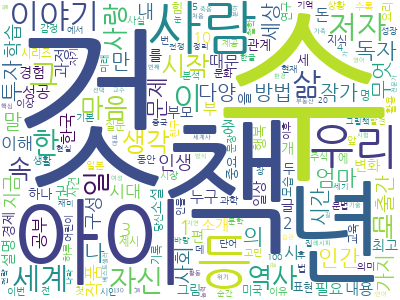

In [121]:
cloud.to_image()

- 책 소개 문서에 자주 등장하는 단어들을 다양한 방법을 통해 확인함

#### 준단어 토큰화

In [8]:
from sentencepiece import SentencePieceProcessor
sp = SentencePieceProcessor()

In [9]:
with open('intro.txt', 'w', encoding='utf8') as f: 
    f.write('\n'.join(df['intro']))

In [10]:
from sentencepiece import SentencePieceTrainer # 토큰화
SentencePieceTrainer.Train('--input=intro.txt --model_prefix=intro --vocab_size=3000')
# voacab_size: 총 어휘수

True

In [11]:
from sentencepiece import SentencePieceProcessor
sp = SentencePieceProcessor()
sp.Load("intro.model")

True

In [12]:
text = df.loc[0, 'intro']

In [13]:
text

'2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이 한 해 동안 발표한 중단편소설 중 가장 눈부신 성취를 보여준 일곱 편의 작품에 수여하는 젊은작가상 지난 10년간 독자들과 상호작용하며 굳건한 신뢰를 쌓아온 이 상이 2020년대로 진입한 첫해 새로이 호명한 수상자는 강화길 최은영 김봉곤 이현석 김초엽 장류진 장희원이다 다시 한번 젊은작가상을 거머쥔 작가들의 탄탄한 행보와 낯선 기대를 품게 하는 신예 작가들의 신선한 기운이 한 권의 책 속에서 조화를 이루게 되었다 이들이 각자의 문학세계를 부단히 갱신한 끝에 탄생시킨 일곱 편의 수상작에는 현재를 박차고 새로운 내일로 뻗어나가려는 전복의 에너지가 응축되어 있다 한 시절의 전환점에 서서 이전까지와는 다른 세계를 겨누며 쓰인 각각의 단편들에서 한국문학이 앞으로 나아가고자 하는 방향과 함께 다가올 미래를 고대하는 작가들의 고요한 열망 또한 엿볼 수 있을 것이다'

In [34]:
sp.encode_as_pieces(text)

['▁2020',
 '년',
 '▁내일',
 '을',
 '▁상상',
 '케',
 '▁하는',
 '▁눈',
 '부',
 '신',
 '▁',
 '터',
 '닝',
 '▁포',
 '인',
 '트',
 '▁등',
 '단',
 '▁10',
 '년',
 '▁이',
 '하',
 '의',
 '▁젊은',
 '▁작가',
 '들이',
 '▁한',
 '▁해',
 '▁동안',
 '▁발표',
 '한',
 '▁중',
 '단',
 '편',
 '소설',
 '▁중',
 '▁가장',
 '▁눈',
 '부',
 '신',
 '▁성취',
 '를',
 '▁보여',
 '준',
 '▁일',
 '곱',
 '▁편',
 '의',
 '▁작품',
 '에',
 '▁수',
 '여',
 '하는',
 '▁젊은',
 '작',
 '가',
 '상',
 '▁지난',
 '▁10',
 '년간',
 '▁독자들',
 '과',
 '▁상',
 '호',
 '작',
 '용',
 '하며',
 '▁',
 '굳',
 '건',
 '한',
 '▁신',
 '뢰',
 '를',
 '▁',
 '쌓',
 '아',
 '온',
 '▁이',
 '▁상',
 '이',
 '▁2020',
 '년대',
 '로',
 '▁진',
 '입',
 '한',
 '▁첫',
 '해',
 '▁새로',
 '이',
 '▁호',
 '명',
 '한',
 '▁수상',
 '자',
 '는',
 '▁강',
 '화',
 '길',
 '▁',
 '최',
 '은',
 '영',
 '▁김',
 '봉',
 '곤',
 '▁이',
 '현',
 '석',
 '▁김',
 '초',
 '엽',
 '▁장',
 '류',
 '진',
 '▁장',
 '희',
 '원',
 '이다',
 '▁다시',
 '▁한번',
 '▁젊은',
 '작',
 '가',
 '상',
 '을',
 '▁거',
 '머',
 '쥔',
 '▁작가',
 '들',
 '의',
 '▁탄탄',
 '한',
 '▁',
 '행',
 '보',
 '와',
 '▁낯',
 '선',
 '▁기대',
 '를',
 '▁',
 '품',
 '게',
 '▁하는',
 '▁신',
 '예',
 '▁작가',
 '들'

In [16]:
cv = CountVectorizer(lowercase=False, tokenizer=sp.encode_as_pieces)

In [18]:
tdm_sp = cv.fit_transform(df['intro'])

In [19]:
tdm_sp.shape

(1501, 3236)

In [20]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_sp.sum(axis = 0).flat
})

In [22]:
word_count.sort_values('빈도', ascending = False).head()

단어     빈도
22    ▁  21308
2688  의  13035
2682  을  11810
2689  이   6968
1867  는   6505

#### 주제분석

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
title_train, title_test, plot_train, plot_test = train_test_split(df['titles'], df['intro'], test_size=.45, random_state=1234)

In [37]:
plot_test.shape

(676,)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nouns)

In [40]:
x_train = cv.fit_transform(plot_train)

In [41]:
x_test = cv.transform(plot_test)

In [42]:
import joblib

In [43]:
data = {
    'x_train': x_train,
    'x_test': x_test,
    'title_train': title_train,
    'title_test': title_test,
    'cv': cv
}

In [44]:
joblib.dump(data, 'intro.pkl')

['intro.pkl']

#### LSA

In [124]:
data = joblib.load('intro.pkl')

In [125]:
locals().update(data)

In [126]:
from sklearn.decomposition import TruncatedSVD

In [127]:
import matplotlib.pyplot as plt

In [233]:
svd = TruncatedSVD(n_components=5, random_state=1234) # 5차원으로

In [234]:
svd.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5,
             random_state=1234, tol=0.0)

In [235]:
doc_emb = svd.transform(x_test)

In [236]:
doc_emb.shape

(676, 5)

- 676개의 문서를 5개의 차원으로 변환

In [237]:
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
# 한글 폰트 세팅

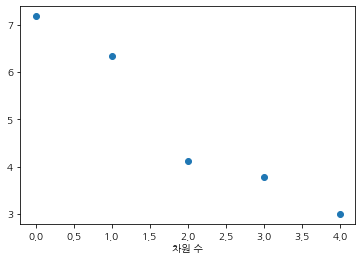

In [238]:
plt.plot(svd.explained_variance_, 'o')
plt.xlabel('차원 수')
plt.show()

In [239]:
svd.components_.shape

(5, 500)

In [240]:
loading = pd.DataFrame(svd.components_.T)

In [241]:
loading['word'] = cv.get_feature_names()

In [242]:
# i: 주제
i = 4
loading.sort_values(i, ascending=False).loc[:,[i, 'word']].head()

4 word
311  0.324387   요리
426  0.320526    책
79   0.248086   기본
310  0.243470  왕초보
98   0.229988    년

In [243]:
for i in range(5):
    display(loading.sort_values(i, ascending=False).loc[:,[i, 'word']].head())

0 word
40   0.420046    것
247  0.403285    수
426  0.333862    책
278  0.253932   아이
98   0.167607    년

1 word
278  0.814042   아이
289  0.289634   엄마
196  0.154876   부모
326  0.064668   육아
149  0.057641   마음

2 word
247  0.459942    수
311  0.372839   요리
79   0.273661   기본
310  0.235782  왕초보
144  0.217018  레시피

3 word
235  0.264498   세계
247  0.245214    수
295  0.220768   역사
395  0.167055   종교
98   0.161575    년

4 word
311  0.324387   요리
426  0.320526    책
79   0.248086   기본
310  0.243470  왕초보
98   0.229988    년

- 각각의 주제에 자주 등장하는 단어 확인하고, 단어와 주제와의 관계를 파악할 수 있다.

In [244]:
joblib.dump(svd, 'svd.pkl')

['svd.pkl']

#### 회전

In [245]:
import joblib
svd = joblib.load('svd.pkl')
data = joblib.load('intro.pkl')
locals().update(data)

C:\Users\LG Gram\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [246]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()

In [247]:
rotated = rotator.fit_transform(svd.components_.T)

In [248]:
rloading = pd.DataFrame(rotated)

In [249]:
rloading['word'] = cv.get_feature_names()

In [250]:
i = 4
rloading.sort_values(i, ascending=False).head()

0         1         2         3         4 word
311 -0.160531 -0.058793 -0.047821 -0.078671  0.472715   요리
40   0.516092  0.076105 -0.191492 -0.158346  0.371801    것
79  -0.129726 -0.024804 -0.023689 -0.038118  0.350894   기본
310 -0.107891 -0.038803 -0.060103 -0.041060  0.325372  왕초보
426  0.064297  0.127090 -0.051562  0.350616  0.293049    책

In [257]:
for i in range(5):
    display(rloading.sort_values(i, ascending=False).loc[:,[i, 'word']].head())

0 word
40   0.516092    것
208  0.315218   사람
218  0.295650    삶
70   0.206471    그
247  0.185760    수

1 word
278  0.865103   아이
289  0.296522   엄마
196  0.163065   부모
426  0.127090    책
40   0.076105    것

2 word
247  0.770704    수
469  0.159665   학습
166  0.148606   문제
137  0.130347    등
111  0.117230   단어

3 word
98   0.431030    년
235  0.355706   세계
426  0.350616    책
295  0.281469   역사
395  0.170374   종교

4 word
311  0.472715   요리
40   0.371801    것
79   0.350894   기본
310  0.325372  왕초보
426  0.293049    책

#### 유사도

In [263]:
x_test.shape

(676, 500)

In [262]:
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
sim = cosine_similarity(x_test, x_test)

In [117]:
sim.shape

(676, 676)

In [118]:
sim[3]

array([0.12777531, 0.09698573, 0.        , 1.        , 0.22792115,
       0.10597598, 0.32221204, 0.05455447, 0.03436041, 0.49784389,
       0.08817334, 0.03516054, 0.30650302, 0.14414999, 0.12393252,
       0.12677314, 0.        , 0.01471225, 0.        , 0.05305581,
       0.23028309, 0.03697369, 0.05154061, 0.        , 0.05455447,
       0.03509312, 0.07142857, 0.03962144, 0.12637882, 0.        ,
       0.06299408, 0.        , 0.        , 0.30083404, 0.06752237,
       0.02099803, 0.06213698, 0.        , 0.11135885, 0.08014632,
       0.        , 0.04145925, 0.09643959, 0.27348549, 0.25253814,
       0.        , 0.21602469, 0.1234931 , 0.11757927, 0.01981072,
       0.07597372, 0.05108094, 0.06043672, 0.04819627, 0.11396058,
       0.04052204, 0.10910895, 0.02196874, 0.05665927, 0.10666772,
       0.0243975 , 0.        , 0.        , 0.0225877 , 0.14520447,
       0.        , 0.27458482, 0.16495722, 0.2227177 , 0.        ,
       0.0805823 , 0.11952286, 0.        , 0.12921915, 0.     

In [120]:
title_test.iloc[58]

'3세 아이에게 꼭 해줘야 할 49가지 (세 살 엄마 수다쟁이가 되어라)'

In [121]:
sim[58]

array([0.0126694 , 0.04327423, 0.03133341, 0.05665927, 0.04519846,
       0.28161205, 0.15335291, 0.09736702, 0.10902279, 0.26326973,
       0.37593675, 0.04648398, 0.08840993, 0.15722309, 0.06939315,
       0.09218021, 0.04879036, 0.03501058, 0.11438728, 0.23673065,
       0.13047672, 0.05865727, 0.07495317, 0.03747658, 0.02163712,
       0.0765515 , 0.04532742, 0.3771469 , 0.12113233, 0.07495317,
       0.29981268, 0.10056023, 0.03004812, 0.17897289, 0.06248755,
       0.00832813, 0.0985778 , 0.        , 0.06183321, 0.05085956,
       0.12267092, 0.14250908, 0.04589925, 0.03796395, 0.04006415,
       0.23970104, 0.18359702, 0.13994057, 0.03886141, 0.09035811,
       0.09039692, 0.03038919, 0.10387045, 0.14336519, 0.07909731,
       0.01607165, 0.04327423, 0.05227877, 1.        , 0.12691802,
       0.05805847, 0.0540664 , 0.        , 0.06718963, 0.09049897,
       0.08048844, 0.09744081, 0.06542449, 0.04416658, 0.03971116,
       0.03196014, 0.05925568, 0.11438728, 0.06833365, 0.08642

In [122]:
import numpy as np

In [123]:
rank = np.argsort(sim[58])
rank

array([516, 524, 138, 627, 162, 473, 176, 204, 219, 575,  77, 393, 365,
        62, 283, 284, 625,  37, 544, 656,  35, 643,   0, 602, 293, 225,
       396, 330,  55, 276, 129, 497, 418, 211,  90, 577, 457, 117, 178,
       323, 329, 584, 650, 281, 363, 488,  24, 140, 145, 122, 317, 376,
        82, 659, 527, 344, 164, 242, 207, 326, 500, 494, 205, 459, 229,
       110, 188,  79, 611, 368, 454, 484, 353, 150, 508, 358, 669, 280,
       402, 383,  32, 493,  51, 620, 282, 487, 221,   2, 530, 428,  70,
       541, 111, 422, 321, 439, 340, 168, 231, 245, 298, 174, 672, 543,
       177, 400, 161, 583, 608,  17, 247, 256, 658, 472, 431, 603,  23,
       269,  43,  48, 533, 227,  69, 187, 618,  87,  44, 128, 657, 392,
        84, 248, 199, 277, 171, 370, 395, 540, 597, 295, 520, 432, 349,
       378,   1,  56, 563, 268, 233, 579, 215, 405, 545, 408, 149,  68,
       155, 531, 619, 232, 272, 183, 606, 451,   4, 379,  26, 572,  42,
       167, 381, 587, 646,  11, 357, 355, 299, 416, 291, 443, 10

In [124]:
top5 = rank[-6:-1] # top5
top5

array([628, 200, 386, 476, 511], dtype=int64)

In [125]:
title_test.iloc[top5]

779                                                문어 목욕탕
1389    우리 아이 초등 교육 대백과 (초등 입학 전부터 초등 6년까지 교육 로드맵을 완성하라!)
1354     세상 편한 서현이네 유아 식판식 (초보 엄마들도 쉽게 따라 할 수 있는 맞춤형 유아식)
689                                                이상한 엄마
1341                                           진짜 기본 베이킹책
Name: titles, dtype: object

- 코사인 유사도를 측정하여 각각의 책과 유사도가 높은 책을 확인할 수 있음

#### svd를 이용해서 유사도 측정

In [292]:
doc_emb = svd.transform(x_test)

In [293]:
sim_emb = cosine_similarity(doc_emb, doc_emb)

In [294]:
sim_emb.shape

(676, 676)

In [269]:
rank = np.argsort(sim_emb[58])
title_test.iloc[rank[-6:-1]]

1288             적당히 육아법 (스스로 잘하는 아이로 키우는 0~7세 최강의 부모 습관)
1303    아이의 공부 태도가 바뀌는 하루 한 줄 인문학 (자기주도 학습력을 높이는 동기부여 ...
1341                                           진짜 기본 베이킹책
813                                     요리조리 열어보는 여러가지 탈것
1408                           영어 그림책 공부법 (혼자서 원서 읽기가 되는)
Name: titles, dtype: object

In [270]:
doc_emb[0]

array([ 1.19645785, -0.6669222 , -1.28642754, -0.20098616,  0.09086142])

In [271]:
sum(doc_emb[0]**2)

3.5798436752926657

- svd를 이용해서도 유사도를 측정하는 것이 가능하며, 그에 따라 각각의 책과 유사도가 비슷한 책을 확인할 수 있음

#### Normalization

In [272]:
from sklearn.preprocessing import Normalizer

In [287]:
norm = Normalizer()

In [288]:
norm_emb = norm.fit_transform(doc_emb)

In [289]:
sum(norm_emb[0]**2) 

1.0000000000000002

In [290]:
sim_norm = cosine_similarity(norm_emb, norm_emb)

In [298]:
sim_norm[0]

array([ 1.        ,  0.69518713,  0.27072214,  0.84247046,  0.78000961,
        0.37747236,  0.83278202,  0.09736552,  0.14507611,  0.48588629,
        0.1183343 ,  0.80690724,  0.72298706,  0.38035442,  0.80112769,
        0.7294981 , -0.09572615,  0.71870424, -0.03074752,  0.13355223,
        0.57962175, -0.13048351,  0.61965777,  0.95530423,  0.03331294,
        0.20425427,  0.55071737,  0.09436186,  0.72485467,  0.11416362,
        0.15635987,  0.92150988, -0.17638102,  0.63077376,  0.92577963,
        0.98473175,  0.0901765 ,  0.81937647,  0.73673576,  0.77336271,
       -0.03068837,  0.39164389,  0.07772981,  0.9115911 ,  0.90866022,
        0.65805499,  0.7652085 ,  0.48195762,  0.87088766,  0.10154501,
        0.57558721,  0.42172868,  0.27892822,  0.62122765,  0.1796373 ,
        0.6613738 ,  0.48883941,  0.77733139,  0.13563571,  0.80137361,
        0.69262942, -0.18040669,  0.19465201,  0.75511777,  0.70820141,
       -0.07929296,  0.86581044,  0.83804757,  0.52340025,  0.56

In [299]:
sim_emb[0]

array([ 1.        ,  0.69518713,  0.27072214,  0.84247046,  0.78000961,
        0.37747236,  0.83278202,  0.09736552,  0.14507611,  0.48588629,
        0.1183343 ,  0.80690724,  0.72298706,  0.38035442,  0.80112769,
        0.7294981 , -0.09572615,  0.71870424, -0.03074752,  0.13355223,
        0.57962175, -0.13048351,  0.61965777,  0.95530423,  0.03331294,
        0.20425427,  0.55071737,  0.09436186,  0.72485467,  0.11416362,
        0.15635987,  0.92150988, -0.17638102,  0.63077376,  0.92577963,
        0.98473175,  0.0901765 ,  0.81937647,  0.73673576,  0.77336271,
       -0.03068837,  0.39164389,  0.07772981,  0.9115911 ,  0.90866022,
        0.65805499,  0.7652085 ,  0.48195762,  0.87088766,  0.10154501,
        0.57558721,  0.42172868,  0.27892822,  0.62122765,  0.1796373 ,
        0.6613738 ,  0.48883941,  0.77733139,  0.13563571,  0.80137361,
        0.69262942, -0.18040669,  0.19465201,  0.75511777,  0.70820141,
       -0.07929296,  0.86581044,  0.83804757,  0.52340025,  0.56

In [300]:
dp = norm_emb @ norm_emb.T

In [301]:
dp[0]

array([ 1.        ,  0.69518713,  0.27072214,  0.84247046,  0.78000961,
        0.37747236,  0.83278202,  0.09736552,  0.14507611,  0.48588629,
        0.1183343 ,  0.80690724,  0.72298706,  0.38035442,  0.80112769,
        0.7294981 , -0.09572615,  0.71870424, -0.03074752,  0.13355223,
        0.57962175, -0.13048351,  0.61965777,  0.95530423,  0.03331294,
        0.20425427,  0.55071737,  0.09436186,  0.72485467,  0.11416362,
        0.15635987,  0.92150988, -0.17638102,  0.63077376,  0.92577963,
        0.98473175,  0.0901765 ,  0.81937647,  0.73673576,  0.77336271,
       -0.03068837,  0.39164389,  0.07772981,  0.9115911 ,  0.90866022,
        0.65805499,  0.7652085 ,  0.48195762,  0.87088766,  0.10154501,
        0.57558721,  0.42172868,  0.27892822,  0.62122765,  0.1796373 ,
        0.6613738 ,  0.48883941,  0.77733139,  0.13563571,  0.80137361,
        0.69262942, -0.18040669,  0.19465201,  0.75511777,  0.70820141,
       -0.07929296,  0.86581044,  0.83804757,  0.52340025,  0.56

- 정규화를 한 후 점곱을 하면 코사인 유사도를 통해 얻은 결과와 똑같은 결과를 얻음

#### LSA를 이용해 단어의 의미를 분석하기

In [140]:
svd.components_.shape

(5, 500)

In [141]:
word_emb = svd.components_.T

In [142]:
word_emb.shape

(500, 5)

In [143]:
joblib.dump(word_emb, 'lsa-word.pkl')

['lsa-word.pkl']

- `감정`라는 단어와 가까이에 있는 단어는 뭐가 있을까?

In [144]:
words = cv.get_feature_names()

In [145]:
words

['1',
 '10',
 '100',
 '12',
 '2',
 '20',
 '2020',
 '21',
 '3',
 '30',
 '4',
 '40',
 '5',
 '50',
 '6',
 '7',
 '8',
 '가',
 '가난',
 '가능',
 '가득',
 '가족',
 '가지',
 '가치',
 '간',
 '간단',
 '감각',
 '감동',
 '감정',
 '강',
 '강력',
 '강의',
 '강조',
 '개',
 '개념',
 '개발',
 '개인',
 '개정판',
 '거',
 '건강',
 '것',
 '게',
 '결과',
 '결정',
 '경제',
 '경험',
 '고민',
 '고전',
 '곳',
 '공감',
 '공개',
 '공부',
 '과',
 '과거',
 '과자',
 '과정',
 '과학',
 '관계',
 '관련',
 '관심',
 '관점',
 '교과서',
 '교수',
 '교육',
 '교재',
 '구성',
 '구체',
 '국가',
 '국내',
 '권',
 '그',
 '그것',
 '그녀',
 '그동안',
 '그림',
 '그림책',
 '극복',
 '글',
 '기록',
 '기본',
 '기술',
 '기억',
 '기업',
 '기존',
 '기초',
 '기회',
 '길',
 '까지',
 '꿈',
 '끝',
 '나',
 '나라',
 '나무',
 '날',
 '내',
 '내용',
 '너',
 '네',
 '년',
 '노력',
 '노하우',
 '놀이',
 '뇌',
 '누구',
 '눈',
 '는',
 '능력',
 '다양',
 '다음',
 '단계',
 '단순',
 '단어',
 '답',
 '당시',
 '당신',
 '대',
 '대비',
 '대상',
 '대신',
 '대통령',
 '대표',
 '대학',
 '대한민국',
 '대화',
 '데',
 '도움',
 '도전',
 '독일',
 '독자',
 '돈',
 '동물',
 '동시',
 '동안',
 '동화',
 '두',
 '뒤',
 '들',
 '등',
 '등장',
 '따뜻',
 '딸',
 '때',
 '때문',
 '뜻',
 '레시피',
 '로',
 '를',
 '리더

In [146]:
i = words.index('감정')

In [147]:
i

28

In [148]:
word_emb[i]

array([ 0.0230211 ,  0.01392165,  0.00053598, -0.01659   , -0.03222369])

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

In [151]:
import numpy as np

In [150]:
sim = cosine_similarity(word_emb, word_emb)

In [152]:
rank = np.argsort(sim[i])

In [153]:
for j in rank[-6:-1]:
    print(words[j])

자존감
목표
부분
나무
자기


- LSA를 통해 문서만이 아니라 단어의 의미도 분석해낼 수 있음

#### 단어 의미의 시각화

In [154]:
import joblib
data = joblib.load('intro.pkl')

In [308]:
words = data['cv'].get_feature_names()

In [156]:
words_emb = joblib.load('lsa-word.pkl') # 단어들의 5차원에서의 좌표

In [157]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm_emb = norm.fit_transform(word_emb)

In [158]:
norm_emb.shape

(500, 5)

In [159]:
import matplotlib.pyplot as plt

In [309]:
words

['1',
 '10',
 '100',
 '12',
 '2',
 '20',
 '2020',
 '21',
 '3',
 '30',
 '4',
 '40',
 '5',
 '50',
 '6',
 '7',
 '8',
 '가',
 '가난',
 '가능',
 '가득',
 '가족',
 '가지',
 '가치',
 '간',
 '간단',
 '감각',
 '감동',
 '감정',
 '강',
 '강력',
 '강의',
 '강조',
 '개',
 '개념',
 '개발',
 '개인',
 '개정판',
 '거',
 '건강',
 '것',
 '게',
 '결과',
 '결정',
 '경제',
 '경험',
 '고민',
 '고전',
 '곳',
 '공감',
 '공개',
 '공부',
 '과',
 '과거',
 '과자',
 '과정',
 '과학',
 '관계',
 '관련',
 '관심',
 '관점',
 '교과서',
 '교수',
 '교육',
 '교재',
 '구성',
 '구체',
 '국가',
 '국내',
 '권',
 '그',
 '그것',
 '그녀',
 '그동안',
 '그림',
 '그림책',
 '극복',
 '글',
 '기록',
 '기본',
 '기술',
 '기억',
 '기업',
 '기존',
 '기초',
 '기회',
 '길',
 '까지',
 '꿈',
 '끝',
 '나',
 '나라',
 '나무',
 '날',
 '내',
 '내용',
 '너',
 '네',
 '년',
 '노력',
 '노하우',
 '놀이',
 '뇌',
 '누구',
 '눈',
 '는',
 '능력',
 '다양',
 '다음',
 '단계',
 '단순',
 '단어',
 '답',
 '당시',
 '당신',
 '대',
 '대비',
 '대상',
 '대신',
 '대통령',
 '대표',
 '대학',
 '대한민국',
 '대화',
 '데',
 '도움',
 '도전',
 '독일',
 '독자',
 '돈',
 '동물',
 '동시',
 '동안',
 '동화',
 '두',
 '뒤',
 '들',
 '등',
 '등장',
 '따뜻',
 '딸',
 '때',
 '때문',
 '뜻',
 '레시피',
 '로',
 '를',
 '리더

In [303]:
from adjustText import adjust_text

In [174]:
xs = norm_emb[indices, 2]
ys = norm_emb[indices, 3]

In [304]:
target = ['가족', '감동', '감정', '부모', '사랑',
          '아빠', '엄마', '어린이', '꿈', '내용',
          '관심', '노력', '교육']

In [310]:
indices = []
for t in target:
    i = words.index(t)
    indices.append(i)

In [311]:
indices

[21, 27, 28, 196, 209, 277, 289, 286, 88, 95, 59, 99, 63]

In [328]:
xs = norm_emb[indices, 0]
ys = norm_emb[indices, 1]

In [329]:
norm_emb[indices,1]

array([-0.09670466,  0.85242394, -0.14601128, -0.34378038,  0.1046058 ,
       -0.39148917,  0.02585947,  0.17164511, -0.07111871,  0.35207202,
       -0.25400863, -0.10612237, -0.34759598])

In [330]:
norm_emb[indices,0]

array([0.59640181, 0.49656254, 0.85937861, 0.86200461, 0.90231809,
       0.74642422, 0.87141253, 0.85979516, 0.93143543, 0.8553986 ,
       0.95158907, 0.67437798, 0.92702052])

In [331]:
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
# 한글 폰트 세팅

7

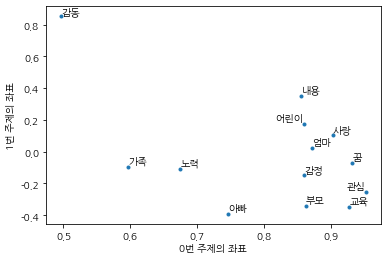

In [333]:
plt.plot(xs, ys, '.')
plt.xlabel('0번 주제의 좌표')
plt.ylabel('1번 주제의 좌표')
texts = [plt.text(x, y, t) for x, y, t in zip(xs, ys, target)]
adjust_text(texts)

- 의미가 비슷한 단어들끼리 비슷한 위치에 있는 것을 확인할 수 있음

In [343]:
from sklearn.manifold import TSNE

In [344]:
tsne = TSNE(n_components=2)

In [345]:
pos = tsne.fit_transform(norm_emb)

In [346]:
pos.shape

(676, 2)

In [347]:
xs = pos[indices, 0]
ys = pos[indices, 1]

7

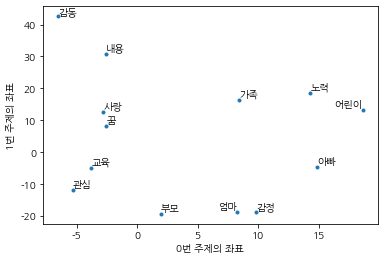

In [348]:
plt.plot(xs, ys, '.')
plt.xlabel('0번 주제의 좌표')
plt.ylabel('1번 주제의 좌표')
texts = [plt.text(x, y, t) for x, y, t in zip(xs, ys, target)]
adjust_text(texts)

#### NMF, LDA

In [185]:
df.head()

titles  \
0                              2020 제11회 젊은작가상 수상작품집   
1  날씨가 좋으면 찾아가겠어요(윈터 에디션: 드라마 방영 한정판)(전2권) (이도우 장...   
2                                 녹나무의 파수꾼 (クスノキの番人)   
3                           사서함 110호의 우편물 (이도우 장편소설)   
4                       어둠의 눈 (The Eyes of Darkness)   

                                            contents  \
0  2020년, 내일을 상상케 하는 눈부신 터닝 포인트!\r \r 등단 10년 이하의 ...   
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...   
2  사상 최초 한국·중국·일본·대만 전 세계 동시 출간!《나미야 잡화점의 기적》을 잇는...   
3  네 사랑이 무사하기를, 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의...   
4  40년 전 ‘코로나19’를 예견한 소설,한국어판 최초 출간!2020년 전 세계 역주...   

                                               intro  
0  2020년 내일을 상상케 하는 눈부신 터닝 포인트 등단 10년 이하의 젊은 작가들이...  
1  시골 마을의 낡은 기와집에 자리한 작은 서점을 중심으로 한 용서와 치유 그리고 사랑...  
2  사상 최초 한국중국일본대만 전 세계 동시 출간나미야 잡화점의 기적을 잇는 또 하나의...  
3  네 사랑이 무사하기를 내 사랑도 무사하니까13주년을 맞아 새롭게 선보이는 이도우의 ...  
4  40년 전 코로나19를 예견한 소설한국어판 최초 출간2020년 전 세계 역주행 베스...

In [186]:
index_train, index_test = train_test_split(df.index, test_size=.45, random_state=1234)

In [187]:
intro_train = df.loc[index_train, 'intro']

In [188]:
intro_test = df.loc[index_test, 'intro']

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

In [190]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nouns)

In [191]:
x_train = cv.fit_transform(intro_train)

In [192]:
x_test = cv.transform(intro_test)

In [193]:
import joblib

In [194]:
data = {
    'x_train': x_train,
    'x_test': x_test,
    'index_train': index_train,
    'index_test': index_test,
    'cv': cv
}

In [195]:
joblib.dump(data, 'book.pkl')

['book.pkl']

#### NMF

In [354]:
import joblib
data = joblib.load('book.pkl')
locals().update(data)

In [355]:
from sklearn.decomposition import NMF

In [389]:
nmf = NMF(n_components=5, random_state=1234)

In [390]:
nmf.fit(x_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=1234, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [391]:
x_test.shape

(676, 500)

In [393]:
doc_emb = nmf.transform(x_test)

In [394]:
doc_emb.shape

(676, 5)

In [395]:
doc_emb[0]

array([0.09286928, 0.        , 0.        , 0.14579749, 0.        ])

In [396]:
doc_emb[0].argmax()

3

In [398]:
import pandas as pd

In [397]:
nmf.components_.shape

(5, 500)

In [399]:
loading = pd.DataFrame(nmf.components_.T)

In [400]:
loading['word'] = cv.get_feature_names()

In [407]:
loading.tail()

0         1         2         3         4  word
495  0.125160  0.071126  0.018282  0.179668  0.004354     후
496  0.000000  0.000000  0.061264  0.121756  0.000000    흐름
497  0.000000  0.000000  0.097237  0.090526  0.000000  흥미진진
498  0.203984  0.000000  0.008825  0.047587  0.000000    희망
499  0.338960  0.112575  0.152006  0.140417  0.004231     힘

In [402]:
for i in range(5):
    display(loading.sort_values(i, ascending=False).loc[:,[i, 'word']].head())

0 word
40   6.938468    것
208  3.076552   사람
218  2.846954    삶
70   1.973878    그
312  1.718021   우리

1 word
278  7.617294   아이
289  2.680287   엄마
196  1.427281   부모
40   1.391595    것
426  1.197396    책

2 word
247  6.719291    수
137  1.309274    등
166  1.155515   문제
469  1.071498   학습
107  0.886660   다양

3 word
98   3.464740    년
426  3.185712    책
235  2.649072   세계
295  1.990316   역사
340  1.225458  이야기

4 word
311  4.057893   요리
79   2.978081   기본
310  2.748622  왕초보
40   2.502177    것
144  2.242457  레시피

- 각 주제에 많이 나오는 단어를 확인할 수 있음

In [404]:
x_recorver = nmf.inverse_transform(doc_emb)

In [405]:
import numpy as np
np.linalg.norm(x_recorver - x_test)

280.7298758130999

#### LDA 데이터 형식 변환

In [233]:
import joblib

In [81]:
data = joblib.load('book.pkl')

In [82]:
locals().update(data)

In [83]:
from gensim.matutils import Sparse2Corpus

In [84]:
corpus = Sparse2Corpus(x_train.T)

In [85]:
corpus[500]

[(191, 1),
 (176, 1),
 (312, 1),
 (343, 1),
 (235, 1),
 (290, 1),
 (209, 1),
 (98, 1),
 (440, 2),
 (498, 1),
 (196, 2),
 (37, 1),
 (278, 1),
 (430, 1),
 (62, 1),
 (336, 1),
 (390, 1),
 (94, 1),
 (63, 1),
 (355, 1),
 (174, 3),
 (91, 1),
 (100, 1),
 (28, 2)]

In [86]:
id2word = dict(enumerate(cv.get_feature_names()))

In [87]:
id2word[180]

'발전'

In [88]:
joblib.dump({'corpus': corpus, 'id2word': id2word}, 'corpus.pkl')

['corpus.pkl']

#### 단어문서행렬을 거치지 않고 gensim 자체의 방법

In [408]:
intro_train = df.loc[index_train, 'intro']

In [409]:
import re

In [410]:
token_re = re.compile(cv.token_pattern)

In [413]:
docs = []
for plot in intro_train:
    doc = []
    for tok in token_re.findall(plot):
        doc.append(tok)
    docs.append(doc)

In [93]:
from gensim.corpora.dictionary import Dictionary

In [94]:
dic = Dictionary(docs)

In [95]:
dic.filter_extremes(no_below=10, no_above=0.2)

In [96]:
dic.token2id

{'가능한': 0,
 '공부하고': 1,
 '놓치지': 2,
 '대비': 3,
 '따른': 4,
 '문제에': 5,
 '반영한': 6,
 '베스트셀러': 7,
 '실전': 8,
 '싶은': 9,
 '안에': 10,
 '않았다': 11,
 '완벽': 12,
 '완벽하게': 13,
 '위한': 14,
 '제대로': 15,
 '최신': 16,
 '같은': 17,
 '경제': 18,
 '과정에서': 19,
 '그것은': 20,
 '누가': 21,
 '다양한': 22,
 '대해': 23,
 '두고': 24,
 '만드는': 25,
 '매우': 26,
 '모아': 27,
 '방대한': 28,
 '배운': 29,
 '번도': 30,
 '변화가': 31,
 '변화와': 32,
 '부의': 33,
 '사람들은': 34,
 '사회를': 35,
 '삶을': 36,
 '세계적인': 37,
 '세상': 38,
 '어떻게': 39,
 '없는': 40,
 '오랜': 41,
 '우리가': 42,
 '위대한': 43,
 '유럽': 44,
 '이후': 45,
 '인류': 46,
 '인류의': 47,
 '있던': 48,
 '자리': 49,
 '조금': 50,
 '중국의': 51,
 '지금껏': 52,
 '찾아': 53,
 '책을': 54,
 '탄생한': 55,
 '특히': 56,
 '편의': 57,
 '했던': 58,
 '혹은': 59,
 '흔히': 60,
 '가지': 61,
 '구성되어': 62,
 '권에': 63,
 '기존의': 64,
 '내용을': 65,
 '다르게': 66,
 '다른': 67,
 '담았다': 68,
 '대표': 69,
 '대한민국': 70,
 '도움을': 71,
 '독자들에게': 72,
 '독자들의': 73,
 '못한': 74,
 '뿐만': 75,
 '사건들을': 76,
 '설민석': 77,
 '쉽게': 78,
 '아니라': 79,
 '아직': 80,
 '알아야': 81,
 '없다': 82,
 '여러': 83,
 '우리에게': 84,
 '이유로': 85,
 '이해하기': 

In [97]:
bows = []
for doc in docs:
    bow = dic.doc2bow(doc)
    bows.append(bow)

In [98]:
joblib.dump({'dic':dic, 'bows': bows}, 'gensim-dic.pkl')

['gensim-dic.pkl']

- 수업에서는 단어문서행렬을 이용한 LDA를 사용할 예정

#### LDA 실습

In [265]:
import joblib
data = joblib.load('corpus.pkl')
locals().update(data)

In [2]:
from gensim.models.ldamodel import LdaModel

In [289]:
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    
    num_topics=5, 
    
    passes=50, 
    iterations=1000, 
    
    random_state=123
)

In [290]:
model.save('lda-model')

In [291]:
model = LdaModel.load('lda-model')

In [292]:
model.show_topic(0)

[('아이', 0.06984171),
 ('수', 0.038382687),
 ('것', 0.026552478),
 ('엄마', 0.0262211),
 ('책', 0.021664163),
 ('등', 0.01646488),
 ('이야기', 0.013560181),
 ('부모', 0.012831812),
 ('요리', 0.011433718),
 ('그림', 0.011153405)]

In [185]:
from gensim.matutils import Sparse2Corpus

In [293]:
data = joblib.load('book.pkl')
x_test = data['x_test']

C:\Users\LG Gram\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [294]:
cps_test = Sparse2Corpus(x_test.T)

In [295]:
data['index_test']

Int64Index([  78,  377,  362,  780,  584, 1370,  151, 1222,  373,  788,
            ...
            1469,  269, 1086, 1243,  559, 1399,  553,  892,  941,  872],
           dtype='int64', length=676)

In [296]:
doc = cps_test[0]

In [297]:
doc

[(91, 1),
 (98, 1),
 (119, 1),
 (134, 1),
 (146, 1),
 (167, 1),
 (188, 2),
 (218, 2),
 (233, 1),
 (242, 3),
 (249, 1),
 (292, 1),
 (312, 1),
 (329, 1),
 (338, 1),
 (340, 1),
 (350, 1),
 (363, 1),
 (430, 1),
 (438, 1),
 (472, 1)]

In [298]:
model.get_document_topics(doc)

[(2, 0.4388678), (4, 0.5376186)]

- 문서가 하나만 있으면 Sparse2Corpus 사용하지 않고 python 코드를 이용해서 바꿀 수 있음

In [299]:
row = x_test[0]

In [300]:
row.indices

array([ 91,  98, 119, 134, 146, 167, 188, 218, 233, 242, 249, 292, 312,
       329, 338, 340, 350, 363, 430, 438, 472])

In [301]:
list(zip(row.indices, row.data))

[(91, 1),
 (98, 1),
 (119, 1),
 (134, 1),
 (146, 1),
 (167, 1),
 (188, 2),
 (218, 2),
 (233, 1),
 (242, 3),
 (249, 1),
 (292, 1),
 (312, 1),
 (329, 1),
 (338, 1),
 (340, 1),
 (350, 1),
 (363, 1),
 (430, 1),
 (438, 1),
 (472, 1)]

#### LDA 평가 실습

In [302]:
import joblib
data = joblib.load('book.pkl')
locals().update(data)

In [303]:
from gensim.models.ldamodel import LdaModel
model = LdaModel.load('lda-model')

- 혼란도 계산

In [304]:
from gensim.matutils import Sparse2Corpus

In [305]:
test_corpus = Sparse2Corpus(x_test.T)

In [306]:
log_pp = model.log_perplexity(test_corpus)

In [307]:
-log_pp

5.759272545179447

In [308]:
2 ** -log_pp

54.1643816217607

- 응집도

In [309]:
intros = df.loc[index_test, 'intro']

In [310]:
import re
token_re = re.compile(cv.token_pattern)

In [311]:
words = set(cv.get_feature_names())

In [312]:
texts = []
for plot in intros:
    text = []
    for word in token_re.findall(plot):
        if word in words:
            text.append(word)
    texts.append(text)

In [313]:
texts[100]

['세계', '시리즈', '인기', '어린이', '인기', '어린이', '인기', '그림', '세계']

In [315]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary()

In [316]:
dic.token2id

{}

In [317]:
dic.token2id = {t: i for i, t in enumerate(cv.get_feature_names())}

In [318]:
dic.token2id

{'1': 0,
 '10': 1,
 '100': 2,
 '12': 3,
 '2': 4,
 '20': 5,
 '2020': 6,
 '21': 7,
 '3': 8,
 '30': 9,
 '4': 10,
 '40': 11,
 '5': 12,
 '50': 13,
 '6': 14,
 '7': 15,
 '8': 16,
 '가': 17,
 '가난': 18,
 '가능': 19,
 '가득': 20,
 '가족': 21,
 '가지': 22,
 '가치': 23,
 '간': 24,
 '간단': 25,
 '감각': 26,
 '감동': 27,
 '감정': 28,
 '강': 29,
 '강력': 30,
 '강의': 31,
 '강조': 32,
 '개': 33,
 '개념': 34,
 '개발': 35,
 '개인': 36,
 '개정판': 37,
 '거': 38,
 '건강': 39,
 '것': 40,
 '게': 41,
 '결과': 42,
 '결정': 43,
 '경제': 44,
 '경험': 45,
 '고민': 46,
 '고전': 47,
 '곳': 48,
 '공감': 49,
 '공개': 50,
 '공부': 51,
 '과': 52,
 '과거': 53,
 '과자': 54,
 '과정': 55,
 '과학': 56,
 '관계': 57,
 '관련': 58,
 '관심': 59,
 '관점': 60,
 '교과서': 61,
 '교수': 62,
 '교육': 63,
 '교재': 64,
 '구성': 65,
 '구체': 66,
 '국가': 67,
 '국내': 68,
 '권': 69,
 '그': 70,
 '그것': 71,
 '그녀': 72,
 '그동안': 73,
 '그림': 74,
 '그림책': 75,
 '극복': 76,
 '글': 77,
 '기록': 78,
 '기본': 79,
 '기술': 80,
 '기억': 81,
 '기업': 82,
 '기존': 83,
 '기초': 84,
 '기회': 85,
 '길': 86,
 '까지': 87,
 '꿈': 88,
 '끝': 89,
 '나': 90,
 '나라': 91,
 '나무': 92,
 '날'

In [140]:
from gensim.models import CoherenceModel

In [319]:
coh = CoherenceModel(model=model, texts=texts, dictionary=dic, coherence='u_mass')

In [320]:
coh

In [321]:
coh.get_coherence()

-8.334134382721937

- 주제 다양도

In [322]:
top_words = set()

for topic in range(5):
    for word, prob in model.show_topic(topic, topn = 25):
        top_words.add(word)

In [323]:
len(top_words)

90

In [324]:
len(top_words) / (25*5)

0.72